In [24]:
import sys
import os
import pandas as pd
import numpy as np
# sys.argv[1]=input()
# path=sys.argv[1]
# path=sys.path.append(os.path.abspath("C:\\Users\\Pavilion\\Desktop\\xab.pos.csv"))
# positive_data=pd.read_csv('/pythoncode/xab.pos.csv', delimiter = ',' ,encoding = 'utf-8')
positive_data=pd.read_csv('C:\\Users\\Pavilion\\Desktop\\xab.pos.csv', delimiter = ',' ,encoding = 'utf-8')

# mean of early stage
# 'C:\\Users\\Pavilion\\Desktop\\xab.pos.csv'
df1mean = np.mean(positive_data,axis=0)
text_file = open('earlystageMeanDf_output.txt', 'w')
text_file.write(df1mean.to_string())
text_file.close()
# df1mean

In [25]:
# sys.argv[2]=input()
# path2=sys.argv[2]
# negative_data=pd.read_csv('/pythoncode/xab.neg.csv', delimiter = ',' ,encoding = 'utf-8')
negative_data=pd.read_csv('C:\\Users\\Pavilion\\Desktop\\xab.neg.csv', delimiter = ',' ,encoding = 'utf-8')
# mean of late stage
#'C:\\Users\\Pavilion\\Desktop\\xab.neg.csv'
df2mean=np.mean(negative_data,axis=0)
# df2mean
negative_data
text_file = open('latestageMeanDf_output.txt', 'w')
text_file.write(df2mean.to_string())
text_file.close()

In [26]:
# s.d of early stage
df1std=positive_data.std()
text_file = open('earlystageStdDf_output.txt', 'w')
text_file.write(df1std.to_string())
text_file.close()

In [27]:
# s.d of late stage
df2std=negative_data.std()
text_file = open('latestageStdDf_output.txt', 'w')
text_file.write(df1std.to_string())
text_file.close()

In [28]:
# Student's t-test for independent samples

import pandas
import csv
from scipy import stats
from math import sqrt
from scipy.stats import t
genes =[]
count = 0
var = []
i=positive_data.index & negative_data.index
stat, p=stats.ttest_ind(positive_data.iloc[i],negative_data.iloc[i])
for i in range(500):
    if(p[i]<0.05):
        var.append(i)
        genes.append(p[i])
genes
# var gives value with columns having p<0.05
# getting mean and sd of var column values

new_pos_df=positive_data.iloc[:,var]
new_neg_df=negative_data.iloc[:,var]
early_meanvalue=np.mean(new_pos_df)
late_meanvalue=np.mean(new_neg_df)
early_sdvalue=np.std(new_pos_df)
late_sdvalue=np.std(new_neg_df)
# inserting p values into csv file

csvData = [['Gene','p-value','Mean_EarlyStage','Mean_LateStage','SD_EarlyStage','SD_LateStage']]
with open('C:\\Users\\Pavilion\\Desktop\\significant_genes.csv', 'w') as csvFile:
    writer = csv.writer(csvFile, dialect='excel')
    writer.writerows(csvData)
    for gene_val,p_value,pos_meanval,neg_meanval,pos_sdval,neg_sdval in zip(var,genes,early_meanvalue,late_meanvalue,early_sdvalue,late_sdvalue):
        csvData2 =[[gene_val,p_value,pos_meanval,neg_meanval,pos_sdval,neg_sdval]] 
        writer.writerows(csvData2)


C:\Users\Pavilion\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\Pavilion\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\Pavilion\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


In [19]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from scipy import stats

path='C:\\Users\\Pavilion\\Desktop\\significant_genes.csv'
dataframe=pd.read_csv(path, delimiter = ',' ,encoding = 'utf-8')
dataframe
# Principal Component Analysis

csv_features=['p-value','Mean_EarlyStage','Mean_LateStage','SD_EarlyStage','SD_LateStage']
X = dataframe.loc[:,csv_features].values
Y = dataframe.loc[:,['Gene']].values
# Standardizing the data

x = StandardScaler().fit_transform(X)
pca = PCA(n_components = 2)
principal_components = pca.fit_transform(x)

principalDf = pd.DataFrame(data = principal_components
             , columns = ['principal component 1', 'principal component 2'])
principalDf

,principal component 1,principal component 2
0,-1.796267,0.551962
1,-1.004504,-1.068790
2,-1.393354,0.308780
3,-1.364030,-0.180455
4,-0.888261,0.022496
5,2.879674,1.942911
6,-0.927867,0.166773
7,1.358058,1.717166
8,-1.221220,-0.042064
9,1.873557,-1.172821


For n_clusters = 2 The average silhouette_score is : 0.6442932613759181
For n_clusters = 3 The average silhouette_score is : 0.5634332318206327
For n_clusters = 4 The average silhouette_score is : 0.5022478714277423
For n_clusters = 5 The average silhouette_score is : 0.49899202349913335
For n_clusters = 6 The average silhouette_score is : 0.4814554711135103


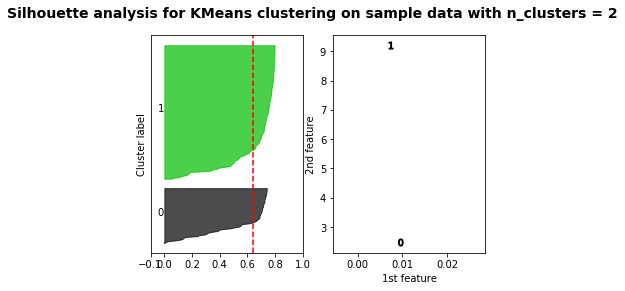

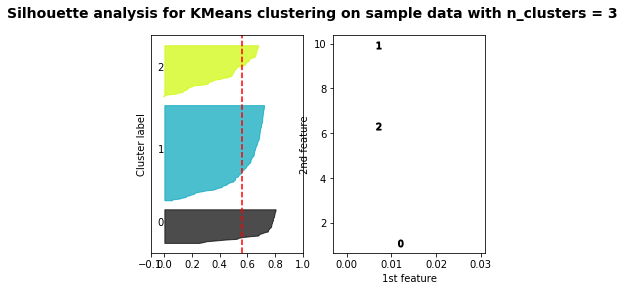

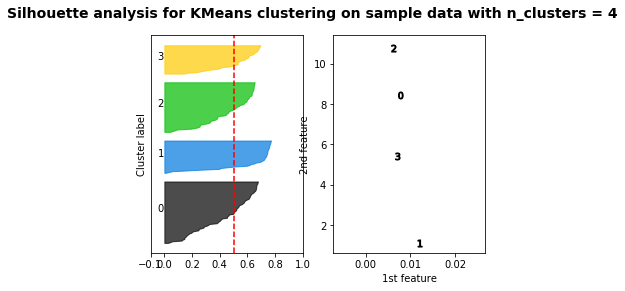

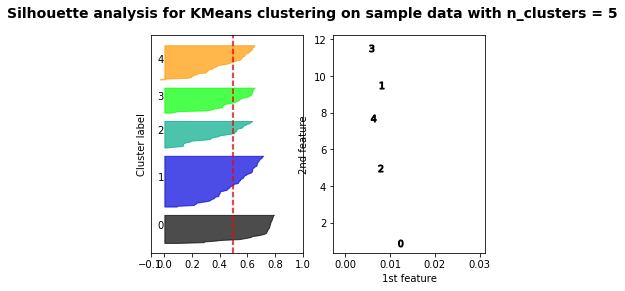

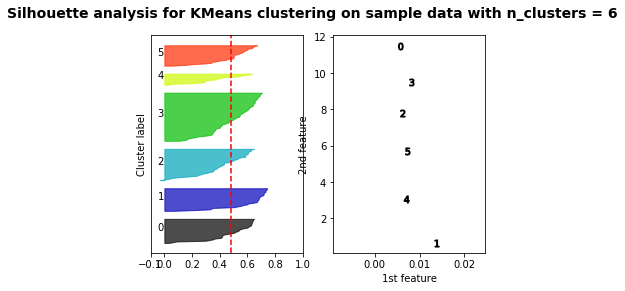

In [29]:
# K-MEANS Clustering 

from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import matplotlib.cm as cm
# principalDf
range_n_clusters = [2, 3, 4, 5, 6]
for n_clusters in range_n_clusters:
    fig, (axis1, ax2) = plt.subplots(1, 2)
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

   # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)
    y_lower=10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        axis1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        axis1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples
    axis1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    axis1.axvline(x=silhouette_avg, color="red", linestyle="--")

    axis1.set_yticks([])  # Clear the yaxis labels / ticks
    axis1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    axis2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')
    ax2.set_xlabel("1st feature")
    ax2.set_ylabel("2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')
plt.show()